[ 0.03830907 -0.13616394 -0.03070217  0.12356748  0.3145475   0.05275241
  0.203288    1.10428736  0.07205143  0.2899311  -0.00376342  1.12668741
 -0.50525518  0.86262353] 0.606541878679


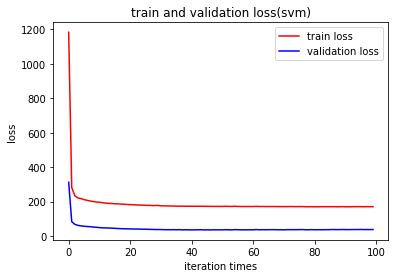

In [4]:
%matplotlib inline
import numpy as np
from numpy import *  
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split  
from sklearn.datasets import load_svmlight_file
x, y = load_svmlight_file("C:\\Users\\baosonglin\\Desktop\\lab1-2.txt")
x_train,x_test, y_train, y_test = train_test_split(x,  
                                                   y,  
                                                   test_size = 0.2,  
                                                   random_state = 0)  

w = np.random.randn(x_train.shape[1])
b = np.random.randn()
epoch = 100 
alpha=0.01
p=0.1
train_loss_list = []    
test_loss_list = []    
for i in range(epoch):
    hinge = 1 - y_train*(x_train*w + b)
    hinge[hinge < 0] = 0
    train_loss = np.sum(hinge) + 0.5*p*np.linalg.norm(w)    
    
    hinge_temp = 1 - y_test*(x_test*w + b)
    hinge_temp[hinge_temp < 0] = 0
    test_loss = np.sum(hinge_temp) + 0.5*p*np.linalg.norm(w)    

    train_loss_list.append(train_loss)    
    test_loss_list.append(test_loss)
        
    # update w and b
    # w_delta = alpha*y_train*x_train
    for j in range(x_train.shape[0]):
        if y_train[j]*(x_train[j]*w + b) < 1:
            w = w + (alpha*y_train[j]*x_train[j]).toarray()[0]
            b = b + alpha*y_train[j] 

print(w,b)
plt.figure()
plt.title('train and validation loss(svm)')
plt.plot(range(len(train_loss_list)), train_loss_list, color='r', label='train loss')

plt.plot(range(len(test_loss_list)), test_loss_list, color='b', label='validation loss')
plt.xlabel('iteration times')
plt.ylabel('loss')
plt.legend()
plt.show()